In [63]:
import pandas as pd

import matplotlib.pyplot as plt

In [64]:
dataset_location = "src/data/ai_job_market.csv"

df = pd.read_csv(dataset_location)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   job_id            2000 non-null   int64 
 1   company_name      2000 non-null   object
 2   industry          2000 non-null   object
 3   job_title         2000 non-null   object
 4   skills_required   2000 non-null   object
 5   experience_level  2000 non-null   object
 6   employment_type   2000 non-null   object
 7   location          2000 non-null   object
 8   salary_range_usd  2000 non-null   object
 9   posted_date       2000 non-null   object
 10  company_size      2000 non-null   object
 11  tools_preferred   2000 non-null   object
dtypes: int64(1), object(11)
memory usage: 187.6+ KB


In [66]:
df.head(5)

,job_id,company_name,industry,job_title,skills_required,experience_level,employment_type,location,salary_range_usd,posted_date,company_size,tools_preferred
0,1,Foster and Sons,Healthcare,Data Analyst,"NumPy, Reinforcement Learning, PyTorch, Scikit...",Mid,Full-time,"Tracybury, AR",92860-109598,2025-08-20,Large,"KDB+, LangChain"
1,2,"Boyd, Myers and Ramirez",Tech,Computer Vision Engineer,"Scikit-learn, CUDA, SQL, Pandas",Senior,Full-time,"Lake Scott, CU",78523-144875,2024-03-22,Large,"FastAPI, KDB+, TensorFlow"
2,3,King Inc,Tech,Quant Researcher,"MLflow, FastAPI, Azure, PyTorch, SQL, GCP",Entry,Full-time,"East Paige, CM",124496-217204,2025-09-18,Large,"BigQuery, PyTorch, Scikit-learn"
3,4,"Cooper, Archer and Lynch",Tech,AI Product Manager,"Scikit-learn, C++, Pandas, LangChain, AWS, R",Mid,Full-time,"Perezview, FI",50908-123743,2024-05-08,Large,"TensorFlow, BigQuery, MLflow"
4,5,Hall LLC,Finance,Data Scientist,"Excel, Keras, SQL, Hugging Face",Senior,Contract,"North Desireeland, NE",98694-135413,2025-02-24,Large,"PyTorch, LangChain"


In [67]:
from sklearn.preprocessing import OneHotEncoder

In [68]:
def OneHotEncoders_for_multiple_data(x):
    set_container = set()
    
    #this is for adding a 
    def adder(x=[]):
        for i in x:
            #too much hassle, so i just make a condition
            if(i[0] == ' '):
                i = i[1:]
            set_container.add(i)
    
    seperator = lambda x: str.split(x, sep=",")
    
    x = x.map(arg=seperator)
    
    x.map(adder)
    
    template = dict(zip(set_container,[0 for i in range(len(set_container))]))
    
    result_container = []
    
    def initiated_counter(x):
        initiated = template.copy()
        for i in x:
            #too much hassle, so i just make a condition
            if(i[0] == ' '):
                i = i[1:]
            if(i in initiated):
                initiated[i] += 1
        return list(initiated.values())
    
    x.map(arg=(
        lambda x: result_container.append(
            initiated_counter(x)
        )
    ))
    
    return pd.DataFrame(result_container, columns=list(set_container))

In [69]:
skill_required = df["skills_required"].copy()
skill_required = OneHotEncoders_for_multiple_data(skill_required)

tools_preferred = df["tools_preferred"].copy()
tools_preferred = OneHotEncoders_for_multiple_data(tools_preferred)

industry = df["industry"].copy()
industry = OneHotEncoders_for_multiple_data(industry)

job_title = df["job_title"].copy()
job_title = OneHotEncoders_for_multiple_data(job_title)

In [70]:
#for this data, we want to seperate the data first, so we can decide what
#we gonna do with this
salary_range_usd = df["salary_range_usd"].copy()
salary_range_usd = pd.DataFrame(pd.DataFrame(salary_range_usd.map(
    arg=lambda x: [int(i) for i in str.split(x, sep="-")]
).to_list()).mean(axis=1, columns=["mean_salary_range"])

In [71]:
salary_range_usd

,mean_salary_range
0,101229.0
1,111699.0
2,170850.0
3,87325.5
4,117053.5
...,...
1995,100254.0
1996,92521.5
1997,157551.0
1998,72463.5


In [72]:
used_df = df.copy()

#because experience level has hirarchy (Entry level obliviously below mid, etc)
#so the treatment for this data is label encoding
experience_level_hirarchy = {"Entry":0, "Mid":1, "Senior":2}

#its also same for company size
company_size_hirarchy = {'Startup':0, 'Mid':1, 'Large':2}

#same
#this hirarchy is unique, because the hirarchy is based on preferability (because who doesnt want remote jobs)
employment_type_hirarchy = {'Internship':0,'Contract':1, 'Full-time':2, 'Remote':3}

#replace the experience_level feature to df
used_df["experience_level"] = used_df["experience_level"].map(experience_level_hirarchy)

#also do it for company_size_hirarchy
used_df["company_size"] = used_df["company_size"].map(company_size_hirarchy)

#same
used_df["employment_type"] = used_df["employment_type"].map(employment_type_hirarchy)

In [73]:
#we change the posted_date feature to datetime type for convinient
used_df["posted_date"] = pd.to_datetime(used_df["posted_date"], format="%Y-%m-%d")

In [74]:
#dropped because we want to do seperate things for these data, so we drop it first
dropped_columns = [
    "skills_required", "tools_preferred", "industry", 
    "job_title", "salary_range_usd", 
    "company_name", "location", "posted_date", "job_id"]

used_df.drop(columns=dropped_columns, inplace=True)

In [75]:
def combine_dataframe(base=pd.DataFrame([]), combined=pd.DataFrame([]), axis=1):
    return pd.concat([base,combined],axis=axis)

list_data = [skill_required, tools_preferred, industry, job_title]

for i in list_data:
    used_df = combine_dataframe(used_df, i)

used_df = combine_dataframe(used_df, salary_range_usd)

# Autoencoder to alldata

In [175]:
from src.app import Transformer

In [176]:
hidden_layer =  [32 ,16, 8]
loss = ""
epoch = 5
to_shape = 4

In [177]:
test = used_df.drop(columns=["employment_type"])

autoencoder = Transformer.transform(
    test, input_shape=len(test.columns), to_shape=to_shape, hidden_layer=hidden_layer, loss=loss, epoch=epoch)
autoencoder_result = pd.DataFrame(
    autoencoder.predict(test)
)

Epoch 1/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 2956.4280 - val_loss: 2560.1323
Epoch 2/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2575.3540 - val_loss: 2543.2690
Epoch 3/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2595.5369 - val_loss: 2539.6025
Epoch 4/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2606.6101 - val_loss: 2537.4058
Epoch 5/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2590.3721 - val_loss: 2536.3203
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [178]:
autoencoder.check_performance(test)

<tf.Tensor: shape=(2000, 48), dtype=float32, numpy=
array([[6.94152117e-01, 6.47565961e-01, 1.74650833e-01, ...,
        1.75509781e-01, 6.96021095e-02, 9.60716324e+01],
       [7.66754270e-01, 7.09819913e-01, 1.92657128e-01, ...,
        1.95725352e-01, 7.82621279e-02, 1.06002945e+02],
       [1.17128611e+00, 1.05462182e+00, 2.94694990e-01, ...,
        3.12386066e-01, 1.23414561e-01, 1.62057068e+02],
       ...,
       [1.08024037e+00, 9.76979256e-01, 2.71778435e-01, ...,
        2.86223501e-01, 1.13179132e-01, 1.49458481e+02],
       [4.98434246e-01, 4.81126070e-01, 1.24968857e-01, ...,
        1.18331052e-01, 4.83304746e-02, 6.88180771e+01],
       [5.27006328e-01, 5.05576909e-01, 1.32092804e-01, ...,
        1.26383871e-01, 5.16673811e-02, 7.27442245e+01]], dtype=float32)>

In [179]:
test

,experience_level,company_size,FastAPI,Power BI,Scikit-learn,Python,MLflow,Keras,Reinforcement Learning,SQL,...,E-commerce,Data Scientist,Quant Researcher,AI Researcher,AI Product Manager,ML Engineer,NLP Engineer,Data Analyst,Computer Vision Engineer,mean_salary_range
0,1,2,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,101229.0
1,2,2,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,111699.0
2,0,2,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,170850.0
3,1,2,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,87325.5
4,2,2,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,117053.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2,2,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,100254.0
1996,1,2,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,92521.5
1997,0,2,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,157551.0
1998,2,2,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,72463.5


In [180]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [181]:
standard_scaler = StandardScaler()
standardscaler_result = standard_scaler.fit_transform(used_df.drop(columns=["employment_type"]))

minmax_scaler = MinMaxScaler()
minmaxscaler_result = minmax_scaler.fit_transform(used_df.drop(columns=["employment_type"]))

robust_scaler = RobustScaler()
robustscaler_result = robust_scaler.fit_transform(used_df.drop(columns=["employment_type"]))

In [182]:
test = standardscaler_result

autoencoder = Transformer.transform(
    test, input_shape=test.shape[1], to_shape=to_shape, hidden_layer=hidden_layer, loss=loss, epoch=epoch)
autoencoder_result = pd.DataFrame(
    autoencoder.predict(test)
)

Epoch 1/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.3896 - val_loss: 0.3781
Epoch 2/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3751 - val_loss: 0.3694
Epoch 3/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3694 - val_loss: 0.3683
Epoch 4/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3697 - val_loss: 0.3670
Epoch 5/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3652 - val_loss: 0.3653
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [183]:
autoencoder.check_performance(test)

<tf.Tensor: shape=(2000, 48), dtype=float32, numpy=
array([[-0.16353312,  0.06483199, -0.25346497, ..., -0.20854357,
        -0.22790974,  0.05063874],
       [ 0.27021673, -0.31213495, -0.26724243, ..., -0.28741765,
        -0.05655107, -0.18915705],
       [-0.6531539 ,  0.3816864 , -0.32544273, ..., -0.27343863,
        -0.5027993 ,  0.2849648 ],
       ...,
       [-0.57129186,  0.32977518, -0.3038215 , ..., -0.25739357,
        -0.4486008 ,  0.24997596],
       [-0.3735791 ,  0.20398381, -0.25593442, ..., -0.22801518,
        -0.31523252,  0.15714182],
       [-0.01922043, -0.04360411, -0.24127726, ..., -0.2037243 ,
        -0.15386432, -0.01085275]], dtype=float32)>

In [184]:
standardscaler_result

array([[ 0.04415586,  1.23599281,  1.94249059, ...,  2.5258808 ,
        -0.36047677, -0.62733869],
       [ 1.27070755,  1.23599281, -0.51480301, ..., -0.3959015 ,
         2.77410385, -0.32619543],
       [-1.18239583,  1.23599281,  1.94249059, ..., -0.3959015 ,
        -0.36047677,  1.37513455],
       ...,
       [-1.18239583,  1.23599281, -0.51480301, ...,  2.5258808 ,
        -0.36047677,  0.99262221],
       [ 1.27070755,  1.23599281, -0.51480301, ..., -0.3959015 ,
        -0.36047677, -1.45470606],
       [ 1.27070755, -1.21759093, -0.51480301, ..., -0.3959015 ,
        -0.36047677, -1.3356006 ]])

In [188]:
test = minmaxscaler_result

autoencoder = Transformer.transform(
    test, input_shape=test.shape[1], to_shape=to_shape, hidden_layer=hidden_layer, loss=loss, epoch=epoch)
autoencoder_result = pd.DataFrame(
    autoencoder.predict(test)
)

Epoch 1/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0964 - val_loss: 0.0850
Epoch 2/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0812 - val_loss: 0.0756
Epoch 3/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0750 - val_loss: 0.0742
Epoch 4/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0738 - val_loss: 0.0738
Epoch 5/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0732 - val_loss: 0.0735
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [189]:
autoencoder.check_performance(test)

<tf.Tensor: shape=(2000, 48), dtype=float32, numpy=
array([[0.4457529 , 0.46907365, 0.19918278, ..., 0.18067282, 0.11649464,
        0.45326653],
       [0.45263028, 0.47696024, 0.19397901, ..., 0.15147579, 0.12555383,
        0.45984876],
       [0.46509752, 0.4924131 , 0.19718128, ..., 0.15501499, 0.10867278,
        0.46473464],
       ...,
       [0.41216314, 0.4375581 , 0.179436  , ..., 0.19119103, 0.11332723,
        0.41486314],
       [0.6354759 , 0.7205746 , 0.21928927, ..., 0.01204742, 0.11684299,
        0.6513763 ],
       [0.48668614, 0.51536644, 0.19922557, ..., 0.13845003, 0.10708161,
        0.48124152]], dtype=float32)>

In [190]:
minmaxscaler_result

array([[0.5       , 1.        , 1.        , ..., 1.        , 0.        ,
        0.3571985 ],
       [1.        , 1.        , 0.        , ..., 0.        , 1.        ,
        0.42690648],
       [0.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.82072664],
       ...,
       [0.        , 1.        , 0.        , ..., 1.        , 0.        ,
        0.73218352],
       [1.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.1656813 ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.19325157]])

In [191]:
autoencoder.get_result(test)

<tf.Tensor: shape=(2000, 4), dtype=float32, numpy=
array([[-0.06371187,  0.295161  , -0.31229836,  0.17189325],
       [-0.10013252,  0.39296976, -0.20958716,  0.15921475],
       [-0.1219354 ,  0.2997097 , -0.6725529 ,  0.33053115],
       ...,
       [-0.02687051,  0.1711081 , -0.07755701,  0.08709335],
       [-0.41644523,  0.87776446, -1.2062681 ,  0.5807757 ],
       [-0.1358397 ,  0.3774166 , -0.81566447,  0.38037714]],
      dtype=float32)>

In [192]:
test = robustscaler_result

autoencoder = Transformer.transform(
    test, input_shape=test.shape[1], to_shape=to_shape, hidden_layer=hidden_layer, loss=loss, epoch=epoch)
autoencoder_result = pd.DataFrame(
    autoencoder.predict(test)
)

Epoch 1/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0924 - val_loss: 0.0804
Epoch 2/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0788 - val_loss: 0.0770
Epoch 3/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0764 - val_loss: 0.0763
Epoch 4/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0757 - val_loss: 0.0758
Epoch 5/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0755 - val_loss: 0.0755
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [193]:
autoencoder.check_performance(test)

<tf.Tensor: shape=(2000, 48), dtype=float32, numpy=
array([[-0.14934573, -0.1369837 ,  0.41528988, ...,  0.13272007,
         0.03640438, -0.19820417],
       [ 0.04639678,  0.07395758,  0.05664354, ...,  0.1473188 ,
         0.19628137,  0.05369678],
       [-0.02919702,  0.0053004 ,  0.32583356, ...,  0.20377953,
         0.12739873, -0.19141762],
       ...,
       [ 0.03229339,  0.05327209,  0.04882762, ...,  0.1281088 ,
         0.1628861 ,  0.08725284],
       [ 0.04872877,  0.0850926 ,  0.13103884, ...,  0.18497616,
         0.21407695, -0.04387125],
       [-0.05376986, -0.04243619,  0.1721584 , ...,  0.09565627,
         0.04331525,  0.03677755]], dtype=float32)>

In [194]:
robustscaler_result

array([[ 0.        ,  0.5       ,  1.        , ...,  1.        ,
         0.        , -0.38586486],
       [ 0.5       ,  0.5       ,  0.        , ...,  0.        ,
         1.        , -0.20200889],
       [-0.5       ,  0.5       ,  1.        , ...,  0.        ,
         0.        ,  0.83669832],
       ...,
       [-0.5       ,  0.5       ,  0.        , ...,  1.        ,
         0.        ,  0.60316436],
       [ 0.5       ,  0.5       ,  0.        , ...,  0.        ,
         0.        , -0.89099466],
       [ 0.5       , -0.5       ,  0.        , ...,  0.        ,
         0.        , -0.8182776 ]])

In [207]:
intership_data = used_df[used_df["employment_type"] == 0].copy().drop("employment_type", axis=1)

contract_data = used_df[used_df["employment_type"] == 1].copy().drop("employment_type", axis=1)

full_time_data = used_df[used_df["employment_type"] == 2].copy().drop("employment_type", axis=1)

remote_data = used_df[used_df["employment_type"] == 3].copy().drop("employment_type", axis=1)

employment_datas = [intership_data, contract_data, full_time_data, remote_data]

index_data_list = []

minmax_scaler_list = []

for i in employment_datas:
    minmax_scaler = MinMaxScaler()
    minmax_scaler.fit(i)
    index_data_list.append(i.index)
    minmax_scaler_list.append(minmax_scaler)

In [208]:
minmax_scaler_list

[MinMaxScaler(), MinMaxScaler(), MinMaxScaler(), MinMaxScaler()]

# check kmeans performance on each partial dataset

In [204]:
from src.report import ElbowMethod

In [210]:
test = minmax_scaler_list[0].transform(intership_data)

autoencoder = Transformer.transform(
    test, input_shape=test.shape[1], to_shape=to_shape, hidden_layer=hidden_layer, loss=loss, epoch=epoch)
autoencoder_result = pd.DataFrame(
    autoencoder.predict(test)
)

Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0979 - val_loss: 0.0954
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0935 - val_loss: 0.0867
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0837 - val_loss: 0.0793
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0769 - val_loss: 0.0761
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0745 - val_loss: 0.0749
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


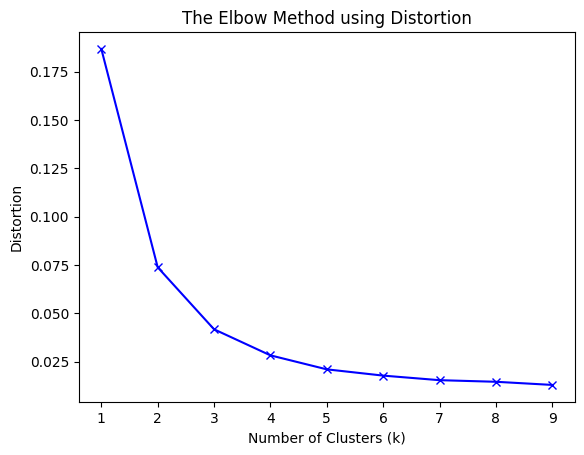

In [211]:
ElbowMethod.report(
    autoencoder.get_result(minmax_scaler.transform(intership_data))
)

In [231]:
test = minmax_scaler_list[0].transform(contract_data)

autoencoder = Transformer.transform(
    test, input_shape=test.shape[1], to_shape=to_shape, hidden_layer=hidden_layer, loss=loss, epoch=epoch)
autoencoder_result = pd.DataFrame(
    autoencoder.predict(test)
)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0975 - val_loss: 0.0965
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0915 - val_loss: 0.0896
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0869 - val_loss: 0.0838
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0814 - val_loss: 0.0797
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0772 - val_loss: 0.0777
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


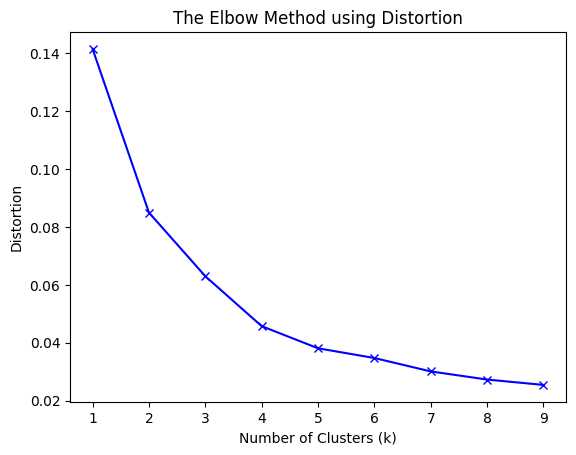

In [232]:
ElbowMethod.report(
    autoencoder.get_result(minmax_scaler.transform(contract_data))
)

In [233]:
test = minmax_scaler_list[0].transform(full_time_data)

autoencoder = Transformer.transform(
    test, input_shape=test.shape[1], to_shape=to_shape, hidden_layer=hidden_layer, loss=loss, epoch=epoch)
autoencoder_result = pd.DataFrame(
    autoencoder.predict(test)
)

Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0999 - val_loss: 0.0946
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0917 - val_loss: 0.0861
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0850 - val_loss: 0.0807
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0794 - val_loss: 0.0772
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0766 - val_loss: 0.0755
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


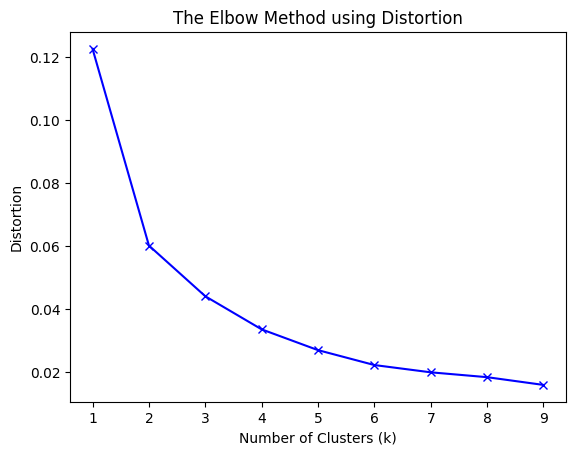

In [234]:
ElbowMethod.report(
    autoencoder.get_result(minmax_scaler.transform(full_time_data))
)

In [235]:
test = minmax_scaler_list[0].transform(remote_data)

autoencoder = Transformer.transform(
    test, input_shape=test.shape[1], to_shape=to_shape, hidden_layer=hidden_layer, loss=loss, epoch=epoch)
autoencoder_result = pd.DataFrame(
    autoencoder.predict(test)
)

Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0987 - val_loss: 0.0982
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0939 - val_loss: 0.0939
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0903 - val_loss: 0.0886
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0854 - val_loss: 0.0827
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0801 - val_loss: 0.0795
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


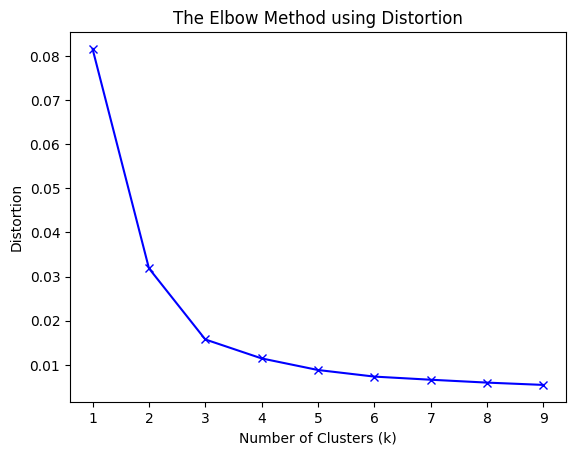

In [236]:
ElbowMethod.report(
    autoencoder.get_result(minmax_scaler.transform(remote_data))
)

# kmeans model implementation

In [237]:
from sklearn.cluster import KMeans

In [238]:
kmeans_model = []

autoencoder_list = []

hidden_layer =  [32 ,16, 8]
loss = ""
epoch = 5
to_shape = 4

index = 0

for i in employment_datas:
    result = minmax_scaler_list[index].transform(i)
    
    autoencoder = Transformer.transform(
        result, input_shape=test.shape[1], to_shape=to_shape, hidden_layer=hidden_layer, loss=loss, epoch=epoch)

    model = KMeans(3)
    
    model.fit(
        autoencoder.get_result(result)
    )
    
    kmeans_model.append(model)
    autoencoder_list.append(autoencoder)
    index += 1

Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0980 - val_loss: 0.0955
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0928 - val_loss: 0.0888
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0858 - val_loss: 0.0820
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0795 - val_loss: 0.0772
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0755 - val_loss: 0.0750
Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0994 - val_loss: 0.0989
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0950 - val_loss: 0.0947
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0908 - val_loss: 0.0881
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0849 - val_loss: 0.0830
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0793 - val_loss: 0.0796
Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1000 - val_loss: 0.0947
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0924 - val_loss: 0.0871


In [239]:
result = df.copy()

In [252]:
result_respect_to_employment_level = []

index = 0

for i in employment_datas:
    result_respect_to_employment_level.append(kmeans_model[index].predict(
        autoencoder_list[index].get_result(minmax_scaler_list[index].transform(i))
    ))
    index += 1

In [253]:
result_on_each_employment_level = []

employment_type_list = [i for i in employment_type_hirarchy.keys()]

index = 0

for i in result_respect_to_employment_level:
    result_on_each_employment_level.append(
        combine_dataframe(
            result[result["employment_type"] == employment_type_list[index]],
            pd.DataFrame(i, columns=["label"], index=index_data_list[index])
        , axis=1)
    )
    index += 1

In [254]:
import numpy as np
from scipy.spatial.distance import cdist

In [255]:
employment_datas[1]

,experience_level,company_size,FastAPI,Power BI,Scikit-learn,Python,MLflow,Keras,Reinforcement Learning,SQL,...,E-commerce,Data Scientist,Quant Researcher,AI Researcher,AI Product Manager,ML Engineer,NLP Engineer,Data Analyst,Computer Vision Engineer,mean_salary_range
4,2,2,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,117053.5
27,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,148691.5
29,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,116250.0
32,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,80135.5
34,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,115927.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,0,1,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,83509.5
1991,0,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,114291.0
1992,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,54933.5
1997,0,2,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,157551.0


In [256]:
result_on_each_employment_level[0]

,job_id,company_name,industry,job_title,skills_required,experience_level,employment_type,location,salary_range_usd,posted_date,company_size,tools_preferred,label
7,8,Mullins Ltd,Education,Data Scientist,"Excel, SQL, Flask",Entry,Internship,"Port Hailey, RU",63032-82144,2024-08-14,Large,BigQuery,2
8,9,Aguilar PLC,Healthcare,ML Engineer,"Pandas, LangChain, GCP, Azure",Entry,Internship,"Butlermouth, GB",134239-188504,2025-09-15,Large,"Scikit-learn, LangChain, BigQuery",2
10,11,Vaughan-Ortiz,Tech,Data Scientist,"Keras, MLflow, Reinforcement Learning",Entry,Internship,"New Angelatown, LU",99964-125971,2024-01-10,Large,"LangChain, BigQuery, Scikit-learn",1
17,18,Smith-Moore,Automotive,AI Product Manager,"Excel, MLflow, Hugging Face, Flask, Power BI",Entry,Internship,"Blevinsburgh, VU",138184-192857,2024-04-29,Startup,BigQuery,2
19,20,Gates LLC,E-commerce,ML Engineer,"R, CUDA, Power BI, AWS",Mid,Internship,"Stevenhaven, BW",115578-207180,2024-08-29,Large,MLflow,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,1980,Cook-Fowler,Finance,AI Product Manager,"FastAPI, Keras, Flask, AWS, GCP",Mid,Internship,"Kevinborough, SE",72541-113000,2024-03-18,Mid,"MLflow, LangChain",2
1987,1988,"Solis, Peters and Walsh",Tech,ML Engineer,"AWS, Azure, Python, R, Scikit-learn, GCP",Senior,Internship,"Jennifermouth, HR",75187-168220,2024-10-12,Large,"BigQuery, TensorFlow, LangChain",1
1989,1990,"Hall, Barber and Young",Tech,Data Scientist,"AWS, Azure, C++, LangChain, Python, Flask",Entry,Internship,"Williamshaven, NI",101664-150656,2025-01-09,Startup,"KDB+, BigQuery",2
1993,1994,Moran-Brown,Tech,NLP Engineer,"Azure, C++, Keras",Senior,Internship,"Brownburgh, WS",149301-234157,2025-01-08,Mid,LangChain,2


In [264]:
result_on_each_employment_level[1][result_on_each_employment_level[1]["label"] == 2]

,job_id,company_name,industry,job_title,skills_required,experience_level,employment_type,location,salary_range_usd,posted_date,company_size,tools_preferred,label
51,52,"Ellis, Crane and Boyle",E-commerce,Computer Vision Engineer,"Azure, Keras, Scikit-learn, Hugging Face, Exce...",Entry,Contract,"North Jason, MR",73140-164506,2025-05-30,Mid,"LangChain, KDB+, FastAPI",2
65,66,"Harris, Porter and Walter",Retail,AI Researcher,"C++, Reinforcement Learning, NumPy, Azure, MLf...",Mid,Contract,"Port Kristenmouth, SA",106117-199125,2023-12-19,Large,"FastAPI, KDB+",2
86,87,Ward-Allen,Education,Quant Researcher,"C++, Power BI, NumPy",Mid,Contract,"Jeffreyburgh, SC",98118-167073,2024-09-10,Large,"LangChain, BigQuery",2
90,91,"Sawyer, Donovan and Vargas",Automotive,NLP Engineer,"TensorFlow, Power BI, FastAPI, LangChain, Scik...",Mid,Contract,"Lake Erica, NL",81426-145890,2023-10-19,Mid,"BigQuery, KDB+, LangChain",2
97,98,"Travis, Fletcher and Rodriguez",Finance,Computer Vision Engineer,"Python, SQL, Power BI, Scikit-learn, FastAPI",Mid,Contract,"Port Julieburgh, KW",127896-227744,2023-12-18,Large,"FastAPI, KDB+, LangChain",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,1822,Valentine-Hodge,Healthcare,AI Researcher,"AWS, Scikit-learn, Keras, PyTorch, LangChain",Entry,Contract,"Jasonborough, CG",64534-127901,2025-04-08,Large,"KDB+, FastAPI",2
1824,1825,Garza-Gilbert,Education,Data Scientist,"R, PyTorch, SQL, NumPy, CUDA",Mid,Contract,"Robertbury, HR",110008-207656,2023-11-24,Large,KDB+,2
1829,1830,Stokes-Cameron,E-commerce,Quant Researcher,"GCP, CUDA, PyTorch, FastAPI, TensorFlow, Excel",Mid,Contract,"Perrymouth, BG",58077-99999,2025-04-01,Startup,KDB+,2
1960,1961,Daniels-Moore,E-commerce,Data Scientist,"NumPy, Hugging Face, C++, Power BI, LangChain",Mid,Contract,"West Justinfort, AO",40402-80152,2025-04-22,Large,"KDB+, FastAPI, TensorFlow",2


In [269]:
result_on_each_employment_level[2][result_on_each_employment_level[2]["experience_level"] == "Senior"]

,job_id,company_name,industry,job_title,skills_required,experience_level,employment_type,location,salary_range_usd,posted_date,company_size,tools_preferred,label
1,2,"Boyd, Myers and Ramirez",Tech,Computer Vision Engineer,"Scikit-learn, CUDA, SQL, Pandas",Senior,Full-time,"Lake Scott, CU",78523-144875,2024-03-22,Large,"FastAPI, KDB+, TensorFlow",0
9,10,Parks LLC,Automotive,Computer Vision Engineer,"Excel, Reinforcement Learning, TensorFlow",Senior,Full-time,"Nicoleshire, BA",79361-165029,2025-08-07,Large,"MLflow, TensorFlow",0
13,14,Frank-Duarte,Retail,Quant Researcher,"Excel, MLflow, NumPy, Hugging Face, LangChain,...",Senior,Full-time,"Christianberg, GQ",137004-193975,2024-11-20,Mid,"LangChain, TensorFlow, Scikit-learn",2
30,31,Gay PLC,Tech,Quant Researcher,"Keras, Excel, TensorFlow",Senior,Full-time,"Port Patriciaport, TG",54565-94461,2024-06-27,Startup,"KDB+, PyTorch",2
54,55,Williams-Vargas,Healthcare,Quant Researcher,"Keras, Excel, FastAPI, Azure, R, PyTorch",Senior,Full-time,"Carlland, ME",135916-233596,2024-11-10,Startup,"FastAPI, TensorFlow, BigQuery",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965,1966,Chen Ltd,Tech,Quant Researcher,"Hugging Face, LangChain, Python, FastAPI, CUDA",Senior,Full-time,"East Markville, GM",125311-197070,2025-01-27,Startup,"KDB+, BigQuery, LangChain",2
1972,1973,"Miller, Russell and Reed",Education,AI Researcher,"Hugging Face, LangChain, Excel, NumPy, Power BI",Senior,Full-time,"East Sylviaborough, ML",74296-157397,2025-06-20,Mid,"BigQuery, FastAPI, LangChain",0
1978,1979,"Johnson, Hughes and Smith",E-commerce,AI Product Manager,"Python, Power BI, MLflow, Hugging Face, FastAPI",Senior,Full-time,"New Michaelmouth, NP",140375-162701,2024-11-09,Large,"TensorFlow, Scikit-learn",0
1983,1984,Ball-Kelly,Automotive,AI Researcher,"Keras, Excel, R",Senior,Full-time,"North Melissashire, LA",126658-206526,2024-08-06,Startup,"BigQuery, MLflow, FastAPI",1


In [259]:
result_on_each_employment_level[3]

,job_id,company_name,industry,job_title,skills_required,experience_level,employment_type,location,salary_range_usd,posted_date,company_size,tools_preferred,label
5,6,Ellis PLC,E-commerce,AI Product Manager,"GCP, Excel, Scikit-learn, MLflow",Senior,Remote,"South Kevin, TZ",92632-180718,2025-08-07,Large,"PyTorch, TensorFlow, FastAPI",1
14,15,Rogers Ltd,Education,NLP Engineer,"Pandas, CUDA, NumPy, FastAPI",Mid,Remote,"New Katieborough, FJ",129842-216741,2024-07-08,Large,FastAPI,0
15,16,Wright-Evans,Automotive,NLP Engineer,"Hugging Face, Scikit-learn, Reinforcement Lear...",Senior,Remote,"Stephaniechester, LU",124669-217866,2024-04-06,Startup,TensorFlow,2
18,19,Webb and Sons,Healthcare,Data Scientist,"AWS, Azure, Power BI, CUDA, Reinforcement Lear...",Senior,Remote,"Parkmouth, CA",100845-159745,2024-10-19,Mid,"BigQuery, FastAPI, KDB+",0
20,21,"Whitaker, Walker and Sandoval",Retail,Quant Researcher,"C++, Power BI, R, SQL, Keras, Azure",Entry,Remote,"Gregorymouth, LV",122521-175168,2024-01-19,Large,"Scikit-learn, BigQuery, PyTorch",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974,1975,"Smith, Simon and Bennett",Tech,Quant Researcher,"CUDA, Hugging Face, GCP, Python, AWS",Entry,Remote,"West Loganburgh, DJ",109031-158268,2025-08-31,Startup,"FastAPI, LangChain",2
1977,1978,Tate-Burnett,Tech,Data Analyst,"LangChain, Reinforcement Learning, CUDA, Panda...",Senior,Remote,"Harrischester, ER",85582-159454,2024-07-13,Large,TensorFlow,0
1981,1982,Schmidt Inc,E-commerce,NLP Engineer,"Flask, GCP, Keras, LangChain, PyTorch",Senior,Remote,"South Craigchester, KG",83082-168419,2024-03-23,Startup,"Scikit-learn, LangChain",0
1988,1989,Webb-Walls,Finance,AI Product Manager,"NumPy, R, FastAPI, SQL",Mid,Remote,"Port Camerontown, BB",75937-160307,2025-02-10,Large,"KDB+, TensorFlow",1
